<a href="https://colab.research.google.com/github/Parthshh19/Waste-Image-Classification-using-Deep-Learning/blob/main/Waste_Image_Classification_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waste classification with image data

**Name:** Parth Sharma

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

This project addresses the business problem of efficiently classifying waste into distinct categories to support automated waste sorting systems, a critical need in waste management for improving recycling efforts and reducing environmental impact. The classification of waste materials can significantly enhance the operational efficiency of recycling facilities, leading to better resource management and sustainability.

**Business Problem:**

With the growing emphasis on sustainable practices, recycling and waste management are essential processes for minimizing environmental damage. Manual sorting of waste is time-consuming and prone to errors, creating a demand for automated systems that can classify waste materials accurately. The goal of this project is to develop a machine learning model capable of automatically classifying six types of waste (cardboard, glass, metal, paper, plastic, and vegetation) based on image data. Improving the accuracy of waste classification would lead to increased recycling rates and reduced contamination in waste streams.

**Dataset:**

The dataset comprises 2,864 labeled images across six categories of waste:
- **Cardboard:** 461 images
- **Glass:** 420 images
- **Metal:** 547 images
- **Paper:** 500 images
- **Plastic:** 500 images
- **Vegetation:** 444 images

The images were preprocessed, and a variety of deep learning models were applied to classify the waste types accurately.

**Methods:**

We explored three deep learning architectures to classify the waste images:

1. **Artificial Neural Network (ANN):** A simple model with one hidden layer.
2. **Convolutional Neural Networks (CNNs):** Two CNN architectures were developed, including the best-performing model, which consisted of multiple convolution layers, max pooling layers, and dense layers, with dropout to prevent overfitting.

**Key Performance Indicators (KPIs):**

Test Accuracy: Measures the model's ability to correctly classify unseen data.

Kappa: A metric that corrects for chance agreement, providing a more accurate measure of performance.

Precision: Measures the proportion of positive predictions that are actually positive.

Recall: Measures the proportion of actual positive cases that are correctly predicted as positive.

F1-score: The harmonic mean of precision and recall, providing a balanced measure.

**Experiments:**

Twelve models were experimented with:

Model 3 and Model 11 consistently demonstrate strong performance across all KPIs, indicating their superiority in terms of overall classification accuracy and balanced performance.

Models 5 and 1 exhibit poor performance, likely due to overfitting or underfitting issues.

Models 2, 4, 6, 7, 8, 9, 10, and 12 show varying degrees of performance, with some models excelling in specific metrics while others struggle in others.

**Results:**

The best-performing model (Model 3) achieved a strong overall test accuracy of 70.65% with a kappa score of 0.648, indicating moderate agreement. Among the categories, "plastic" was the most challenging to classify, with a precision of 0.51, recall of 0.63, and an F1-score of 0.70, indicating the need for further optimization to enhance the classification performance of this class.

This project demonstrates that advanced CNN architectures are effective for image-based waste classification, although further model refinements and class-specific adjustments are necessary to improve overall accuracy, particularly for challenging classes like plastic.

<a id = "cell_Preperation"></a>
## 1. Platform Preperation

Load the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import math

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Dropout, Conv2D, Flatten, MaxPooling2D, Activation,
    BatchNormalization, LeakyReLU, GlobalAveragePooling2D
)
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

We upload images in the different folders to Google Drive. We create a folder named as `Dataset MIS780 A2` in the Google Drive. Its target path should be "/content/drive/My Drive/Colab Notebooks/". After that, we upload folders, under the `dataset'.

Now, we can import those images on Google Colab by below codes:

In [ ]:
from google.colab import drive
#it will open a webpage for verifying your google account. if it is successful, the Google colab can link the Google drive
drive.mount('/content/drive')

# to show the folders under the dataset
!ls "/content/drive/My Drive/Colab Notebooks/Dataset MIS780 A2/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/drive/My Drive/Colab Notebooks/Dataset MIS780 A2/': No such file or directory


In [ ]:
import os

# Set the paths to the folders containing the image files
Cardboard_path = '/content/drive/MyDrive/Colab Notebooks/Dataset MIS 780 A2/Cardboard'
Glass_path = '/content/drive/MyDrive/Colab Notebooks/Dataset MIS 780 A2/Glass'
Metal_path = '/content/drive/MyDrive/Colab Notebooks/Dataset MIS 780 A2/Metal'
Paper_path = '/content/drive/MyDrive/Colab Notebooks/Dataset MIS 780 A2/Paper'
Plastic_path = '/content/drive/MyDrive/Colab Notebooks/Dataset MIS 780 A2/Plastic'
Vegetation_path = '/content/drive/MyDrive/Colab Notebooks/Dataset MIS 780 A2/Vegetation'

We read raw data under two folders and decode it into a tensor by `TensorFlow`. Each file is assigned a label based on which folder it is in. The images are also resized to a 100x100 resolution using the resize function. Image data and labels are stored in a list called `data`.

In [ ]:
import os
import tensorflow as tf

# Create a list to store the image data and labels
data = []

# Iterate through the files in the first folder
for file in os.listdir(Cardboard_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(Cardboard_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Cardboard'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the second folder
for file in os.listdir(Glass_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(Glass_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Glass'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the third folder
for file in os.listdir(Metal_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(Metal_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Metal'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the fourth folder
for file in os.listdir(Paper_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(Paper_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Paper'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the fifth folder
for file in os.listdir(Plastic_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(Plastic_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Plastic'
    # Add the image data and label to the data list
    data.append((img, label))

# Iterate through the files in the sixth folder
for file in os.listdir(Vegetation_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(Vegetation_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Vegetation'
    # Add the image data and label to the data list
    data.append((img, label))

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

We check the total number of files under the different folders

In [ ]:
# get a list of all files in the folder
Cardboard_file_list = os.listdir(Cardboard_path)
Glass_file_list = os.listdir(Glass_path)
Metal_file_list = os.listdir(Metal_path)
Paper_file_list = os.listdir(Paper_path)
Plastic_file_list = os.listdir(Plastic_path)
Vegetation_file_list = os.listdir(Vegetation_path)

# print the total number of files
print(f'Total number of files under Cardboard folder are: {len(Cardboard_file_list)}')
print(f'Total number of files under Glass folder are: {len(Glass_file_list)}')
print(f'Total number of files under Metal folder are: {len(Metal_file_list)}')
print(f'Total number of files under Paper folder are: {len(Paper_file_list)}')
print(f'Total number of files under Plastic folder are: {len(Plastic_file_list)}')
print(f'Total number of files under Vegetation folder are: {len(Vegetation_file_list)}')

Total number of files under Cardboard folder are: 461
Total number of files under Glass folder are: 420
Total number of files under Metal folder are: 547
Total number of files under Paper folder are: 500
Total number of files under Plastic folder are: 500
Total number of files under Vegetation folder are: 444


The data is shuffled and split into a training set and a test set using list slicing. The training set consists of the first 70% of the data, and the test set consists of the remaining 30%.

In [ ]:
# Shuffle the data and split into train/test sets
random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

We allocate X_train, X_test, Y_train, and Y_test and convert them into NumPy arrays for later CNN module training.

In [ ]:
# Extract the image data and labels from the training data
X_train, Y_train = zip(*train_data)

# Extract the image data and labels from the testing data
X_test, Y_test = zip(*test_data)

# Convert the image data and labels into NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

We normalize the input data, the X_train and X_test, respectively.

In [ ]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# print the shape of the reshaped data
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (2010, 50, 50, 3)
Testing matrix shape (862, 50, 50, 3)


We apply the unique integer mapping encoding for the classes.

In [ ]:
print('The original format of class of the first element in the training dataset is: ',Y_train[0], '\n')

import numpy as np
# Create a NumPy array with category strings
categories = np.array(['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Vegetation'])

# Create a mapping from category strings to integers
category_map = {'Cardboard' : 0, 'Glass' : 1, 'Metal' : 2, 'Paper' : 3, 'Plastic' :4, 'Vegetation' : 5}

# Encode the categories
Y_train = np.array([category_map[category] for category in Y_train])
Y_test = np.array([category_map[category] for category in Y_test])

print('The unique integer mapping encoding format of the class of the first element in the training dataset is: ',Y_train[0])

The original format of class of the first element in the training dataset is:  Plastic 

The unique integer mapping encoding format of the class of the first element in the training dataset is:  4


We plot some color images from the training data.

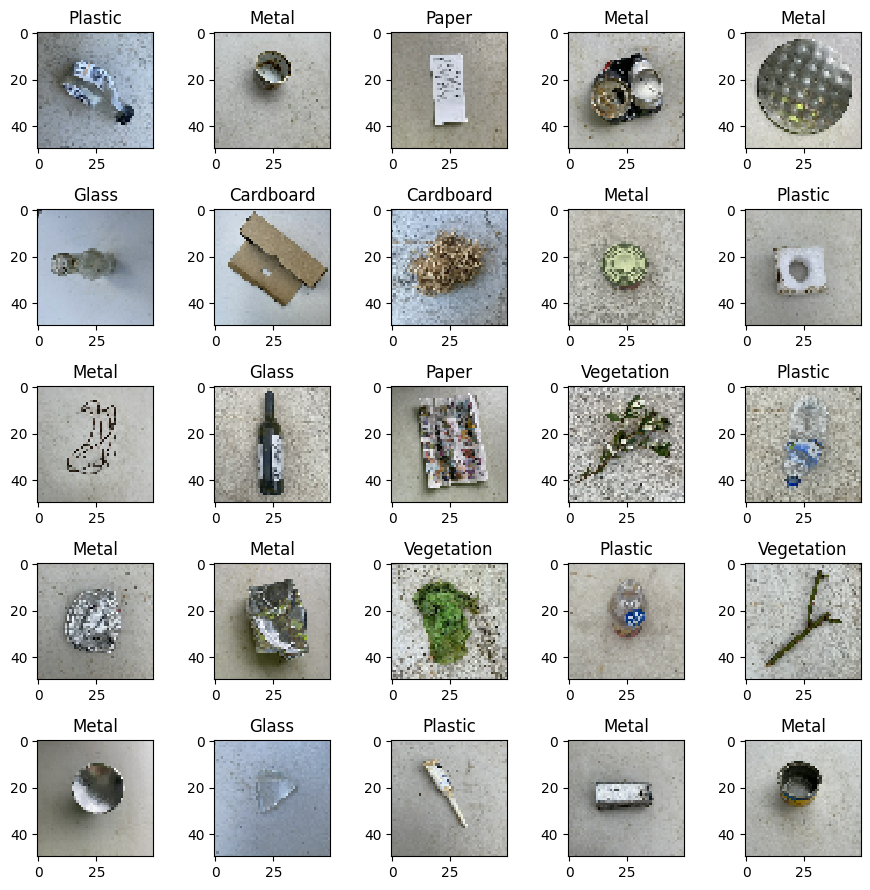

In [ ]:
# change the default figure size for all plots created in the program
plt.rcParams['figure.figsize'] = (9,9)

labels =  ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Vegetation']

for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5,5,i+1)
    # plt.imshow() function displays the image at index i in the X_train array as a grayscale image, with no interpolation applied.
    plt.imshow(X_train[i], interpolation='none')
    plt.title("{}".format(labels[int(Y_train[i])]))

plt.tight_layout()

<a id = "cell_model"></a>
## 3. Predictive Modeling

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets.*

Deep Learning Model Construction

In [ ]:
# Data parameters
img_rows, img_cols = 50, 50
channels = 3
num_classes = 6
class_names = ['Cardboard', 'Glass', 'Metal', 'Paper', 'Plastic', 'Vegetation']

In [ ]:
from keras.utils import to_categorical

# convert class vectors to binary class matrices
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Reshape images for processing
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, channels)

Build some models with varied architectures (e.g. layers, nodes)

Model 1 - Traditional ANN with one Flatten layer, one Hidden Layer, and one Output layer

In [ ]:
def model_1():
    model = Sequential()
    model.add(Flatten(input_shape=(img_rows, img_cols,channels)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 2 - CNN model with two Convolution layers, one Pooling layer with max pooling, which are stacked on top of a traditional ANN model


In [ ]:
def model_2():
    model = Sequential()
    model.add(Conv2D(50, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

Model 3: Increase Filters in Convolution Layers

In [ ]:
def model_3():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 4: Deeper CNN with More Convolution Layers

In [ ]:
def model_4():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 5: Using Batch Normalization

In [ ]:
def model_5():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 6: Varying Kernel Sizes

In [ ]:
def model_6():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 7: Leaky ReLU Activation

In [ ]:
def model_7():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(img_rows, img_cols,channels)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 8: Global Average Pooling Instead of Flattening

In [ ]:
def model_8():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 9: More Dropout

In [ ]:
def model_9():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 10: Smaller Model with Fewer Parameters

In [ ]:
def model_10():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 11: Adding More Dense Layers

In [ ]:
def model_11():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Model 12: With Data Augmentation

In [ ]:
def model_12():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols,channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    model.summary()
    return model

Define callback to record training performnace.

In [ ]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

Model 3 Execution

In [ ]:
model = model_3()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 22, 22, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 11, 11, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │       3,965,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,042,374 (15.42 MB)

 Trainable params: 4,042,374 (15.42 MB)

 Non-trainable params: 0 (0.00 B)

Compile and fit the model using `RMSprop` optimizer. <br/>

In [ ]:
model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001,weight_decay=1e-6),
              metrics=['accuracy'])

#Other Optimizers that can be used instead of RMSprop
#Adadelta(lr=0.001, rho=0.95, epsilon=1e-07)
#Adadelta(lr=0.05, rho=0.99, epsilon=1e-07)
#Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

hist = model.fit(X_train, Y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(X_test, Y_test),
      validation_split=0.2,
      callbacks=keras_callbacks)

Epoch 1/100
16/16 - 5s - 313ms/step - accuracy: 0.2065 - loss: 1.9247 - val_accuracy: 0.4664 - val_loss: 1.6805
Epoch 2/100
16/16 - 1s - 86ms/step - accuracy: 0.3134 - loss: 1.7049 - val_accuracy: 0.2146 - val_loss: 1.9806
Epoch 3/100
16/16 - 0s - 19ms/step - accuracy: 0.3751 - loss: 1.6040 - val_accuracy: 0.4281 - val_loss: 1.4597
Epoch 4/100
16/16 - 1s - 40ms/step - accuracy: 0.4493 - loss: 1.4567 - val_accuracy: 0.4536 - val_loss: 1.3850
Epoch 5/100
16/16 - 0s - 20ms/step - accuracy: 0.5000 - loss: 1.3091 - val_accuracy: 0.5371 - val_loss: 1.2433
Epoch 6/100
16/16 - 0s - 19ms/step - accuracy: 0.5289 - loss: 1.2194 - val_accuracy: 0.5336 - val_loss: 1.2318
Epoch 7/100
16/16 - 0s - 19ms/step - accuracy: 0.5323 - loss: 1.2297 - val_accuracy: 0.4838 - val_loss: 1.3301
Epoch 8/100
16/16 - 0s - 20ms/step - accuracy: 0.5731 - loss: 1.1120 - val_accuracy: 0.5197 - val_loss: 1.2349
Epoch 9/100
16/16 - 1s - 38ms/step - accuracy: 0.5866 - loss: 1.0804 - val_accuracy: 0.5255 - val_loss: 1.2075


Evaluate the model

In [ ]:
# Evaluate on training data
train_score = model.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.0176
Train accuracy: 0.999 

Test loss: 1.114
Test accuracy: 0.7065


Plot history of learning

Create a function to plot history.

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

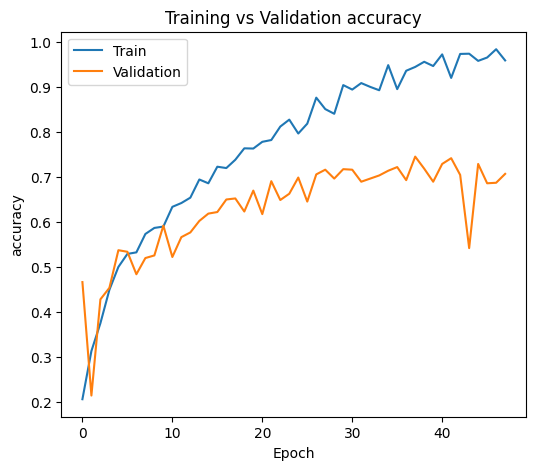

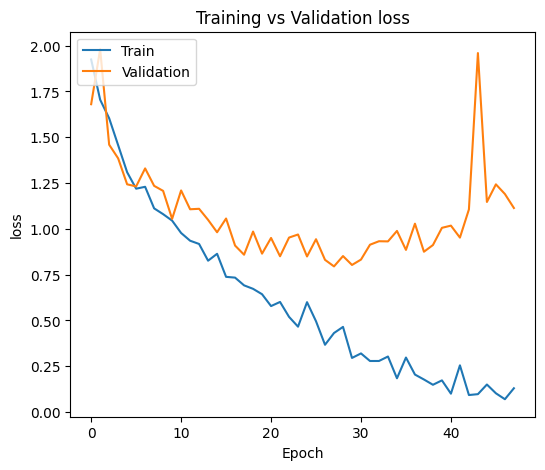

In [ ]:
plot_hist(pd.DataFrame(hist.history))

The graphs show the **Training vs Validation Accuracy** and **Training vs Validation Loss** of the model over 45 epochs. Here’s an interpretation of each:

**Training vs Validation Accuracy:**
- The **blue line** represents the training accuracy, which increases steadily over the epochs, reaching almost 100% by the end of training.
- The **orange line** represents the validation accuracy, which improves initially but plateaus around 70%, with some fluctuations.

Interpretation:
- The model is learning well on the training data, as evidenced by the smooth increase in training accuracy.
- The model performs well on the training set but doesn't generalize as well to unseen data. The fluctuations in the validation accuracy suggest that the model may be learning noise or irrelevant details from the training data.

**Training vs Validation Loss:**
- The **blue line** represents the training loss, which decreases smoothly and steadily, indicating that the model's performance on the training data is improving.
- The **orange line** represents the validation loss, which decreases initially but starts to fluctuate and increase as training progresses.

Interpretation:
- The model is minimizing the training loss effectively, but the validation loss stops improving and shows a slight upward trend.

Computing the **accuracy, precision, recall, f1-score, and support**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Convert the predicted labels to continuous-multioutput format
Y_pred_continuous = np.round(Y_pred)

# Convert the predicted labels to multiclass format
Y_pred_multiclass = np.argmax(Y_pred, axis=1)
Y_test_multiclass = np.argmax(Y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(Y_test_multiclass, Y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(Y_test_multiclass, Y_pred_multiclass, target_names= class_names)

# Print the report
print("The result of the classification report is: \n ",report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
The result of Kappa is : 0.648
The result of the classification report is: 
                precision    recall  f1-score   support

   Cardboard       0.63      0.72      0.67       138
       Glass       0.81      0.76      0.78       135
       Metal       0.73      0.55      0.63       161
       Paper       0.77      0.58      0.66       154
     Plastic       0.51      0.73      0.60       143
  Vegetation       0.94      0.95      0.95       131

    accuracy                           0.71       862
   macro avg       0.73      0.72      0.71       862
weighted avg       0.73      0.71      0.71       862



Generate Confusion Matrix for inspection.

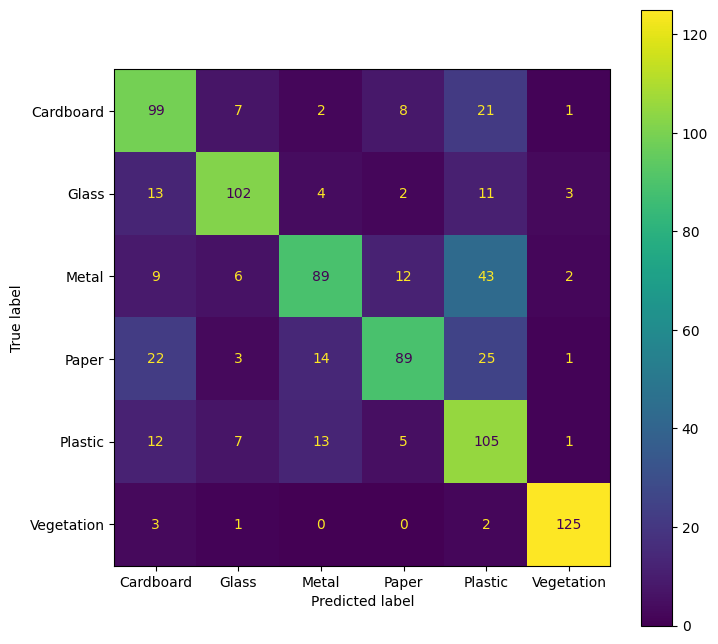

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    Y_test_multiclass,
    Y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names)

# Create a figure with a larger size
fig = plt.figure(figsize=(8, 8))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

**Key Observations:**

Based on the visual representation, here are some specific interpretations:

Class-Specific Performance:

Cardboard: The model correctly classifies most Cardboard instances (99), with some misclassifications as Glass (7) and Metal (2).

Glass: The model also performs well for Glass, with 102 correctly classified instances. However, there are some misclassifications as Cardboard (13) and Metal (4).

Metal: The majority of Metal instances are correctly classified (89), but there are notable misclassifications as Cardboard (9), Glass (6), and Paper (12).

Paper: Paper instances are classified reasonably well, with 89 correct predictions. However, there are some misclassifications as Cardboard (22) and Metal (3).

Plastic: The model struggles to classify Plastic instances accurately, with only 105 correctly classified out of 137.

Vegetation: The model excels at classifying Vegetation, with 125 out of 127 instances correctly predicted.

**Overall Performance:**

While the model demonstrates good performance for certain classes (e.g., Vegetation), it struggles with others, particularly Plastic. This suggests that the model might benefit from further training or adjustments to address the classification challenges for these specific classes.

Print sample predictions

Create a function to plot images.

In [ ]:
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


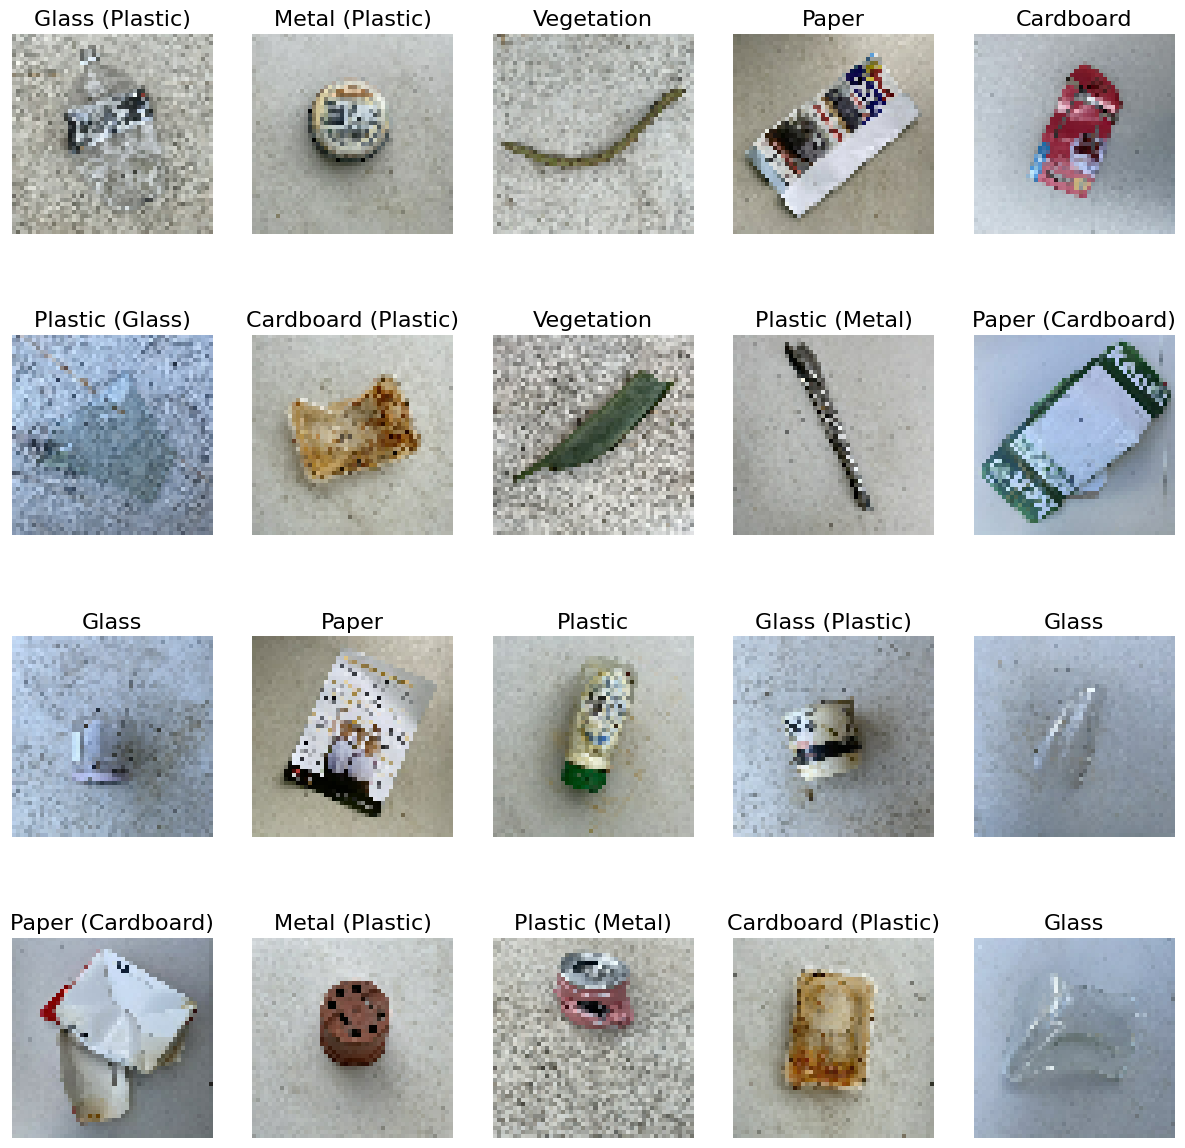

In [ ]:
img_range = range(20)
imgs = X_test[img_range]
true_labels = [class_names[np.argmax(x)] for x in Y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [class_names[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(15,15), titles=titles)

<a id = "cell_report"></a>
## 4. Experiments Report

Here is a table summarizing the performance metrics of all 12 models:

| Model  | Architecture Description                                                                                                                                                  | Train Accuracy | Test Accuracy | Train Loss | Test Loss | Kappa | Observations                                                                                                                                               |
|--------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------|---------------|------------|-----------|-------|------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Model 1 | Traditional ANN: Flatten + Dense (128) + Dropout (0.2) + Dense (6)                                                                                                         | 0.1826         | 0.2088        | 1.79       | 1.7864    | 0.0   | Very low accuracy; all predictions skewed toward one class (Metal).                                                                                         |
| Model 2 | CNN: Conv2D (50) + MaxPooling + Dropout (0.25) + Flatten + Dense (128) + Dropout (0.5) + Dense (6)                                                                          | 0.7234         | 0.6763        | 0.0727     | 0.9925    | 0.611 | Significant improvement over Model 1; good generalization.                                                                                                  |
| Model 3 | CNN: Conv2D (64) + MaxPooling + Conv2D (128) + MaxPooling + Flatten + Dense (256) + Dropout (0.5) + Dense (6)                                                               | 0.9990          | 0.7065        | 0.017      | 1.1140    | 0.06  | High accuracy and strong balance between precision and recall.                                                                                              |
| Model 4 | CNN: Conv2D (32) + MaxPooling + Conv2D (64) + MaxPooling + Conv2D (128) + MaxPooling + Flatten + Dense (256) + Dropout (0.5) + Dense (6)                                     | 0.7308         | 0.6531        | 0.6627     | 0.8845    | 0.582 | Good accuracy, especially on the vegetation class, but some variability between classes.                                                                     |
| Model 5 | CNN: Conv2D (32) + BatchNorm + MaxPooling + Conv2D (64) + BatchNorm + MaxPooling + Flatten + Dense (128) + Dropout (0.5) + Dense (6)                                         | 0.1607         | 0.1473        | 11.9701    | 12.7259   | 0.007 | Batch normalization added but did not improve performance; poor results.                                                                                   |
| Model 6 | CNN: Conv2D (64) + MaxPooling + Conv2D (128) + MaxPooling + Flatten + Dense (256) + Dropout (0.5) + Dense (6)                                                               | 0.6468         | 0.5603        | 0.891      | 1.1395    | 0.468 | Moderate performance but still shows overfitting (lower test accuracy).                                                                                     |
| Model 7 | CNN: Conv2D (64) + LeakyReLU + MaxPooling + Conv2D (128) + LeakyReLU + MaxPooling + Flatten + Dense (256) + LeakyReLU + Dropout (0.5) + Dense (6)                           | 0.6637         | 0.5534        | 0.7962     | 1.3376    | 0.462 | Performance similar to Model 6, with no significant improvement from LeakyReLU.                                                                              |
| Model 8 | CNN: Conv2D (64) + MaxPooling + Conv2D (128) + MaxPooling + GlobalAveragePooling + Dense (256) + Dropout (0.5) + Dense (6)                                                   | 0.5318         | 0.4826        | 1.2255     | 1.2783    | 0.379 | GlobalAveragePooling did not improve results; model struggles with complex patterns.                                                                        |
| Model 9 | CNN: Conv2D (64) + MaxPooling + Dropout (0.3) + Conv2D (128) + MaxPooling + Dropout (0.4) + Flatten + Dense (256) + Dropout (0.5) + Dense (6)                               | 0.7856         | 0.681         | 0.6058     | 0.7952    | 0.617 | More balanced performance with dropout but still overfitting evident.                                                                                        |
| Model 10| CNN: Conv2D (32) + MaxPooling + Conv2D (64) + MaxPooling + Flatten + Dense (128) + Dropout (0.3) + Dense (6)                                                                | 0.7587         | 0.6659        | 0.6074     | 0.9306    | 0.598 | Solid performance, good recall for most classes, but still some variability.                                                                                 |
| Model 11| CNN: Conv2D (64) + MaxPooling + Conv2D (128) + MaxPooling + Conv2D (256) + MaxPooling + Flatten + Dense (256) + Dropout (0.5) + Dense (6)                                   | 0.7283         | 0.6734        | 0.6894     | 0.8647    | 0.617 | Performs well across all metrics, fairly consistent across classes, but some overfitting.                                                                    |
| Model 12| CNN: Conv2D (64) + MaxPooling + Conv2D (128) + MaxPooling + Conv2D (256) + MaxPooling + GlobalAveragePooling + Dense (256) + Dropout (0.5) + Dense (6)                      | 0.6017         | 0.5406        | 1.0429     | 1.3293    | 0.456 | Similar structure to Model 11 but less performance due to use of GlobalAveragePooling.                                                                       |

This table provides a clear comparison of the architecture, accuracy, loss, kappa score, and overall observations for each model. Models 3 stands out with better test accuracy and generalization across multiple classes.

Identifying the Worst-Performing Class:

The worst-performing class in Model 3 is **plastic**, with the following metrics:
- **Precision:** 0.51
- **Recall:** 0.73
- **F1-Score:** 0.60

This indicates that while the model is reasonably good at predicting plastic when it does so (precision), it often fails to detect plastic items (recall). The low F1-score reflects a balance between these two metrics, suggesting that plastic is harder for the model to correctly classify than other waste types.

Reasons for Poor Performance on Plastic:

Several factors may explain the poor performance for plastic:
1. **Visual Similarities with Other Classes**: Plastic may share visual characteristics with materials like glass or metal (e.g., transparency, reflective surfaces), causing confusion in the classification.
2. **Inconsistent Representations**: Plastic items come in a variety of shapes, sizes, and colors, leading to greater variability in the data compared to more consistent materials like vegetation or cardboard.
4. **Feature Complexity**: The model may not have captured complex visual features unique to plastic due to limitations in architecture or training data.

Approaches to Improve Performance:

1. **Data Augmentation and Collection**:
   - **Increase Plastic Data**: Gather more samples of plastic waste to ensure the model is well-exposed to its variability.
   - **Data Augmentation**: Apply augmentation techniques like rotation, scaling, and flipping specifically to plastic images to improve model generalization.

2. **Advanced Preprocessing**:
   - **Class-Specific Augmentation**: Introduce targeted augmentation techniques for plastic (e.g., adding noise, changing brightness) to make the model more robust to variability.
   - **Class Balancing**: If plastic is underrepresented, use oversampling or synthetic data generation (SMOTE) to balance the dataset.

3. **Modeling Techniques**:
   - **Deeper Architecture**: Incorporate more convolutional layers to capture complex patterns, especially for ambiguous classes like plastic.
   - **Attention Mechanisms**: Add attention layers to help the model focus on key areas of the image that differentiate plastic from other materials.

4. **Transfer Learning**:
   - Use pre-trained models like ResNet or EfficientNet that have learned features from large-scale image datasets. Fine-tuning them on this waste dataset could help the model better differentiate between subtle class differences.

5. **Ensemble Methods**:
   - **Model Ensembles**: Combine predictions from multiple models, which may improve robustness for classes like plastic by averaging out errors from individual models.

Business Application and Real-World Deployment Considerations:

1. **Automated Waste Sorting**: A highly accurate waste classification model can be deployed in waste management systems to automatically sort waste into categories. This would improve recycling efficiency and reduce human errors.
   - **Impact**: More accurate sorting leads to better recycling rates, reduced contamination, and cost savings in waste processing.

2. **Scalability**: In real-world applications, the solution needs to handle larger and more diverse datasets, accounting for different lighting conditions, image qualities, and backgrounds.

3. **Deployment Concerns**:
   - **Hardware Requirements**: The model must be lightweight enough to run in real-time on edge devices, such as cameras installed at recycling plants.
   - **Maintenance**: Regular retraining is needed as waste materials evolve (e.g., new types of plastic). Continuous data collection and model updates ensure the system stays relevant.
   - **Accuracy vs. Cost Trade-Off**: Achieving near-perfect accuracy may require high-end hardware and advanced models, which could drive up costs. Balancing performance and feasibility is key.

By addressing these challenges, waste classification can lead to more efficient and sustainable waste management practices.